<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_set_2020/blob/master/PSD_USA_ROTINAS_set_30_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 5.1MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 38.02 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 38.21 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [8]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

Cloning into 'marquesgabi_set_2020'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 222 (delta 16), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (222/222), 6.96 MiB | 30.71 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020


In [9]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [10]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 37.70 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [11]:
df=Segmenta(img)


In [12]:
print(df)

    Width           0           1  ...         781         782         783
0     189  159.775040  167.075455  ...    0.000000    0.054870    0.274348
1     147   76.514748   79.131523  ...   90.215424  100.392288  106.410423
2     147   37.766445   34.895687  ...   90.385490   95.458054   97.766449
3     188   79.855583   96.665909  ...   41.035763   39.133541   43.228611
4     161   73.697548   62.843105  ...  152.714554  163.544434  149.907379
..    ...         ...         ...  ...         ...         ...         ...
45    121   62.020149   55.101086  ...   55.679871   61.110443   70.001228
46    196   38.530613   29.857141  ...  115.040817  115.265305  103.122444
47    148    1.378378    1.163623  ...  105.016808   83.536896   66.376923
48    153   43.858772   45.950962  ...   59.401726   61.090862   65.298904
49    196  102.244896  103.142853  ...   42.102039   41.836735   33.183674

[150 rows x 785 columns]


In [13]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 22.3670 - accuracy: 0.4519
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 4.4848 - accuracy: 0.4956
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 2.9052 - accuracy: 0.4956
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5259 - accuracy: 0.5219
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 2.5132 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 3.3665 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 3.0810 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 2.3923 - accuracy: 0.4956
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5908 - accuracy: 0.4956
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8246 - accuracy: 0.5073
Epoch 11

In [ ]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


In [15]:
#print(confusion_matrix)

In [16]:
#print(METRICS)

In [17]:
#print(y_pred.ravel())

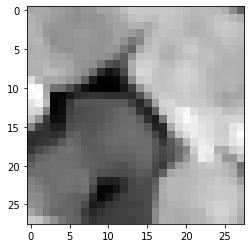

In [18]:
Size=28
qual_img=8
data=np.array(df.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [19]:
Escolha=['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 
         'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 
         'IMC1', 'IMC2']

Prop=Escolha[1] 

In [20]:
Width_All=df['Width']
df=df.drop('Width',axis=1)
#df_mahotas=Mahotas(Prop,df,Width_All)
Features_Total=Mahotas(Prop,df,Width_All)
print(Features_Total)

KeyError: ignored

In [ ]:
print(Width_All)

In [ ]:
df.shape